SVM on Loaddatset


=== Extended SVM Experiment Results ===

      C  Kernel  Holdout Accuracy  Holdout Time (s)  CV Accuracy (5-fold)  \
0   0.1  linear            0.9730          1.325652              0.972375   
1   1.0  linear            0.9785          3.138832              0.976875   
2  10.0  linear            0.9795          4.757612              0.978625   
3   0.1     rbf            0.9180          5.896154              0.910000   
4   1.0     rbf            0.9520          2.873418              0.947500   
5  10.0     rbf            0.9515          2.573395              0.954625   

   CV Time (s)  
0     6.194038  
1     5.681250  
2     5.929864  
3     9.065607  
4     4.556878  
5     3.835403  


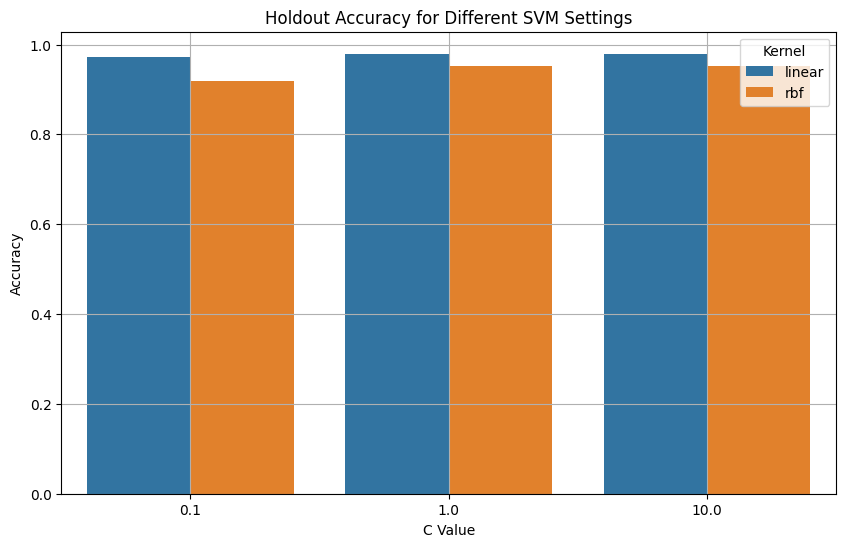

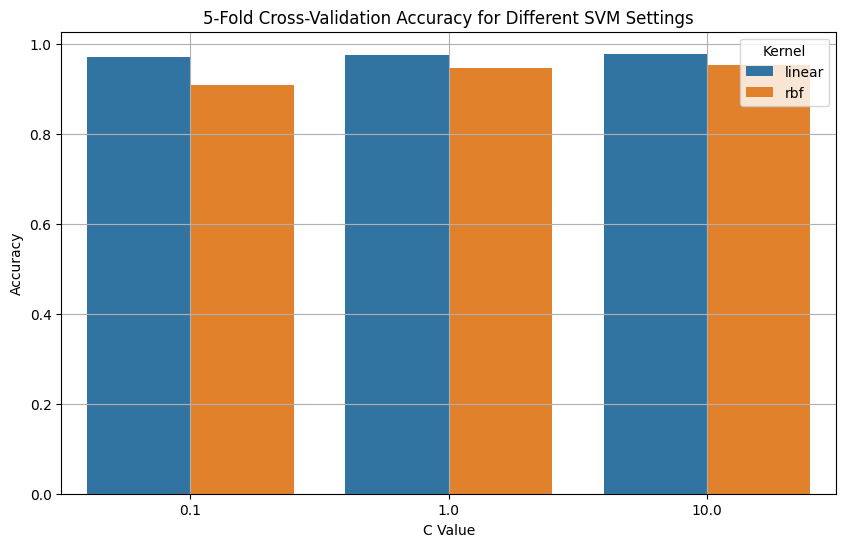

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load Data
file_path = r'C:\Users\USER\Documents\PandasApp\loan-10k.lrn.csv'  # Dataset path 
loan_data = pd.read_csv(file_path)

# Step 2: Preprocessing
# Drop ID column
loan_data_clean = loan_data.drop(columns=['ID'])

# Identify features and target
target_column = 'loan_status'
X = loan_data_clean.drop(columns=[target_column])
y = loan_data_clean[target_column]

# Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Define SVM Settings for Experiments
svm_settings = [
    {"C": 0.1, "kernel": "linear"},
    {"C": 1.0, "kernel": "linear"},
    {"C": 10, "kernel": "linear"},
    {"C": 0.1, "kernel": "rbf"},
    {"C": 1.0, "kernel": "rbf"},
    {"C": 10, "kernel": "rbf"},
]

# Step 4: Train and Evaluate SVMs with Different Settings
svm_results = []

for setting in svm_settings:
    # Create the SVM model
    svm_model = SVC(C=setting["C"], kernel=setting["kernel"], gamma='scale', random_state=42)

    # Train and evaluate on holdout validation set
    start_time_holdout = time.time()
    svm_model.fit(X_train, y_train)
    y_pred_val = svm_model.predict(X_val)
    holdout_accuracy = accuracy_score(y_val, y_pred_val)
    holdout_time = time.time() - start_time_holdout

    # Evaluate with 5-fold Cross-Validation
    start_time_cv = time.time()
    cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cross_val_accuracy = np.mean(cv_scores)
    cross_val_time = time.time() - start_time_cv

    # Save results
    svm_results.append({
        "C": setting["C"],
        "Kernel": setting["kernel"],
        "Holdout Accuracy": holdout_accuracy,
        "Holdout Time (s)": holdout_time,
        "CV Accuracy (5-fold)": cross_val_accuracy,
        "CV Time (s)": cross_val_time,
    })

# Step 5: Summarize Results
svm_results_df = pd.DataFrame(svm_results)

# Display the summary
print("\n=== Extended SVM Experiment Results ===\n")
print(svm_results_df)

#plot results
plt.figure(figsize=(10, 6))
sns.barplot(data=svm_results_df, x="C", y="Holdout Accuracy", hue="Kernel")
plt.title("Holdout Accuracy for Different SVM Settings")
plt.ylabel("Accuracy")
plt.xlabel("C Value")
plt.legend(title="Kernel")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=svm_results_df, x="C", y="CV Accuracy (5-fold)", hue="Kernel")
plt.title("5-Fold Cross-Validation Accuracy for Different SVM Settings")
plt.ylabel("Accuracy")
plt.xlabel("C Value")
plt.legend(title="Kernel")
plt.grid(True)
plt.show()
